# QUESTION: Video Games Sales

Input: \
Critic score - bad, regular, good \
User score - bad, regular, good \
Year - old, modern

Output: \
Sales - low, medium, high 

Rules:

IF (critic score is bad) AND (user score is bad) AND (year is old), THEN sales is low. \
IF (critic score is bad) AND (user score is bad) AND (year is modern), THEN sales is low. \
IF (critic score is bad) AND (user score is regular) AND (year is old), THEN sales is low. \
IF (critic score is bad) AND (user score is regular) AND (year is modern), THEN sales is low. \
IF (critic score is bad) AND (user score is good) AND (year is old), THEN sales is low. \
IF (critic score is bad) AND (user score is good) AND (year is modern), THEN sales is low.

IF (critic score is regular) AND (user score is bad) AND (year is old), THEN sales is low. \
IF (critic score is regular) AND (user score is bad) AND (year is modern), THEN sales is low. \
IF (critic score is regular) AND (user score is regular) AND (year is old), THEN sales is low. \
IF (critic score is regular) AND (user score is regular) AND (year is modern), THEN sales is medium. \
IF (critic score is regular) AND (user score is good) AND (year is old), THEN sales is medium. \
IF (critic score is regular) AND (user score is good) AND (year is modern), THEN sales is high.

IF (critic score is good) AND (user score is bad) AND (year is old), THEN sales is low. \
IF (critic score is good) AND (user score is bad) AND (year is modern), THEN sales is low. \
IF (critic score is good) AND (user score is regular) AND (year is old), THEN sales is medium. \
IF (critic score is good) AND (user score is regular) AND (year is modern), THEN sales is high. \
IF (critic score is good) AND (user score is good) AND (year is old), THEN sales is high. \
IF (critic score is good) AND (user score is good) AND (year is modern), THEN sales is high.

Q: How high is the global sales if the critic score is rated 39 out of 100, the user score is rated 7 out of 10, and the year published is 2000?

## 1. Install scikit-fuzzy package & libraries

In [1]:
# install fuzzy package
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
data = pd.read_csv("Video Game Sales.csv")

## 2. Declare fuzzy variable and membership function

In [3]:
# new Antecedent/Consequent objects hold universe variables and membership functions

critic_score = ctrl.Antecedent(np.arange(0, 101, 1), 'critic score')
user_score = ctrl.Antecedent(np.arange(0, 11, 1), 'user score')
year = ctrl.Antecedent(np.arange(1990, 2020, 1), 'year')

sales = ctrl.Consequent(np.arange(0, 91, 1), 'sales')

## 3. Create fuzzy membership function for Critic Score

D:\Installation\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


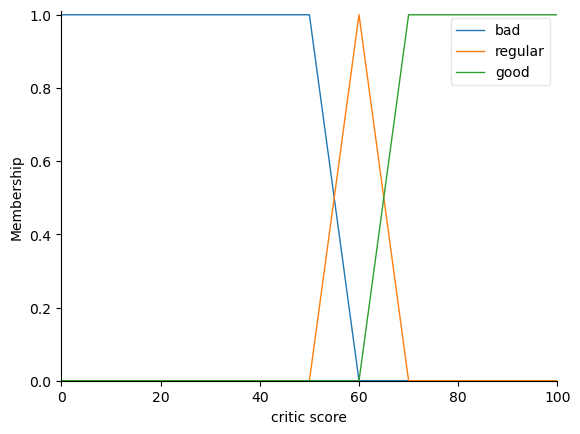

In [4]:
# create membership function for Critic Score
critic_score['bad'] = fuzz.trapmf(critic_score.universe, [0, 0, 50, 60])
critic_score['regular'] = fuzz.trimf(critic_score.universe, [50, 60, 70])
critic_score['good'] = fuzz.trapmf(critic_score.universe, [60, 70, 100, 101])

# visualize plot generated 
critic_score.view()

## 4. Create fuzzy membership function for User Score

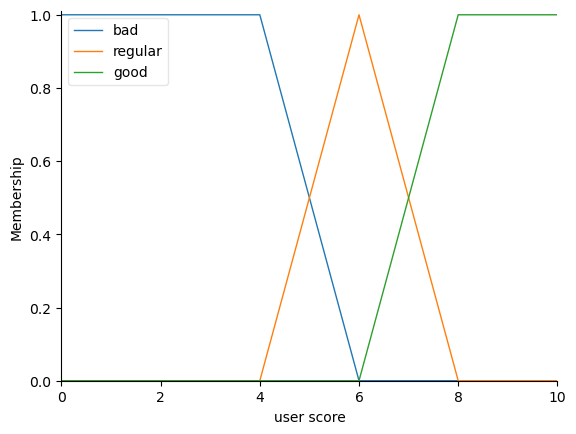

In [5]:
# create membership function for User Score
user_score['bad'] = fuzz.trapmf(user_score.universe, [0, 0, 4, 6])
user_score['regular'] = fuzz.trimf(user_score.universe, [4, 6, 8])
user_score['good'] = fuzz.trapmf(user_score.universe, [6, 8, 10, 11])

# visualize plot generated 
user_score.view()

## 5. Create fuzzy membership function for Year

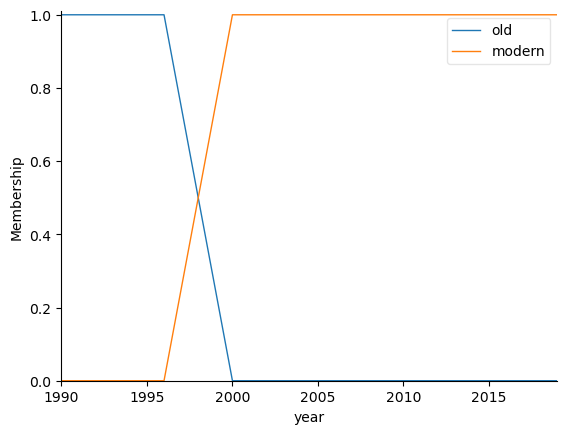

In [6]:
# custom membership function for Year
year['old'] = fuzz.trapmf(year.universe, [0, 0, 1996, 2000])
year['modern'] = fuzz.trapmf(year.universe, [1996, 2000, 2019, 2020])

# visualize plot generated 
year.view()

## 6. Create fuzzy membership function for Sales

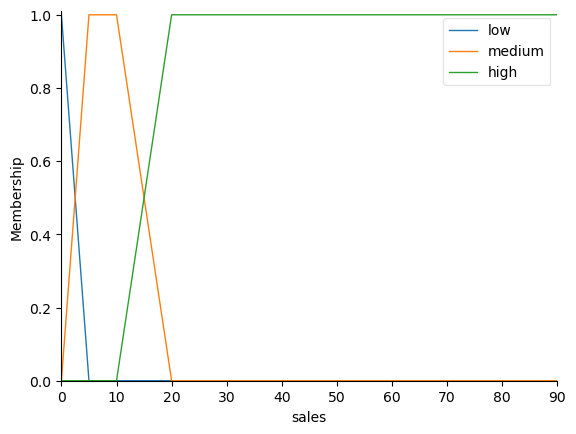

In [7]:
# custom membership function for Sales
sales['low'] = fuzz.trimf(sales.universe, [0, 0, 5])
sales['medium'] = fuzz.trapmf(sales.universe, [0, 5, 10, 20])
sales['high'] = fuzz.trapmf(sales.universe, [10, 20, 90, 91])

# visualize plot generated 
sales.view()

## 7. Construct fuzzy rules

In [8]:
# create rules
rule1 = ctrl.Rule(critic_score['bad'] & (user_score['bad'] & year['old']), sales['low'])
rule2 = ctrl.Rule(critic_score['bad'] & (user_score['bad'] & year['modern']), sales['low'])
rule3 = ctrl.Rule(critic_score['bad'] & (user_score['regular'] & year['old']), sales['low'])
rule4 = ctrl.Rule(critic_score['bad'] & (user_score['regular'] & year['modern']), sales['low'])
rule5 = ctrl.Rule(critic_score['bad'] & (user_score['good'] & year['old']), sales['low'])
rule6 = ctrl.Rule(critic_score['bad'] & (user_score['good'] & year['modern']), sales['low'])

rule7 = ctrl.Rule(critic_score['regular'] & (user_score['bad'] & year['old']), sales['low'])
rule8 = ctrl.Rule(critic_score['regular'] & (user_score['bad'] & year['modern']), sales['low'])
rule9 = ctrl.Rule(critic_score['regular'] & (user_score['regular'] & year['old']), sales['low'])
rule10 = ctrl.Rule(critic_score['regular'] & (user_score['regular'] & year['modern']), sales['medium'])
rule11 = ctrl.Rule(critic_score['regular'] & (user_score['good'] & year['old']), sales['medium'])
rule12 = ctrl.Rule(critic_score['regular'] & (user_score['good'] & year['modern']), sales['high'])

rule13 = ctrl.Rule(critic_score['good'] & (user_score['bad'] & year['old']), sales['low'])
rule14 = ctrl.Rule(critic_score['good'] & (user_score['bad'] & year['modern']), sales['low'])
rule15 = ctrl.Rule(critic_score['good'] & (user_score['regular'] & year['old']), sales['medium'])
rule16 = ctrl.Rule(critic_score['good'] & (user_score['regular'] & year['modern']), sales['high'])
rule17 = ctrl.Rule(critic_score['good'] & (user_score['good'] & year['old']), sales['high'])
rule18 = ctrl.Rule(critic_score['good'] & (user_score['good'] & year['modern']), sales['high'])

game_sales_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18])
game_sales = ctrl.ControlSystemSimulation(game_sales_ctrl)

## 8. Defuzzification

Game sales: 1.94


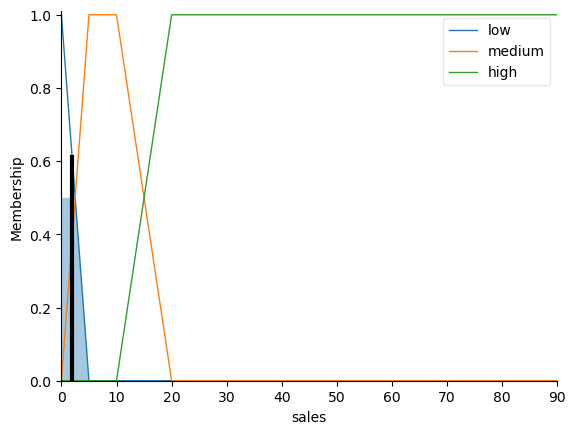

In [9]:
game_sales.input['critic score'] = 39
game_sales.input['user score'] = 7
game_sales.input['year'] = 2000
game_sales.compute()

print("Game sales:", round(game_sales.output['sales'], 2)) 
sales.view(sim=game_sales)

## 9. Results

In [11]:
i = 0
total = 0
row = 6894

while (i < row):
    
    sales = data.loc[i,'Global_Sales']
    game_sales.input['critic score'] = data.loc[i,'Critic_Score']
    game_sales.input['user score'] = data.loc[i,'User_Score']
    game_sales.input['year'] = data.loc[i,'Year_of_Release']
    game_sales.compute()
    
    if ((game_sales.output['sales'] <5) & (sales == 'low')):
        result = "✔️"
        total+=1
    elif ((game_sales.output['sales'] <10) & (sales == 'medium')):
        result = "✔️"
        total+=1
    elif ((game_sales.output['sales'] <90) & (sales == 'high')):
        result = "✔️"
        total+=1
    else:
        result = "❌" 
        
    print(i+1, game_sales.output['sales'], sales, result, sep="   ")
    # Add a column for classification result to the csv
    data.loc[i,'Classification Result'] = game_sales.output['sales']
    data.to_csv("Video Game Sales - NEW.csv", index=False)
    i+=1
    
# Classification accuracy calculation   
print("")
print(total, "/", row)
print("Accuracy = ", total/row*100,"%")

1   52.44444444444445   low   ❌
2   1.6666666666666665   low   ✔️
3   52.44444444444445   low   ❌
4   1.6992753623188408   low   ✔️
5   34.4986876640421   low   ❌
6   51.480519480519405   low   ❌
7   52.44444444444445   low   ❌
8   52.44444444444445   low   ❌
9   52.44444444444445   low   ❌
10   52.44444444444445   low   ❌
11   52.44444444444445   low   ❌
12   52.44444444444445   low   ❌
13   52.44444444444445   low   ❌
14   1.6666666666666665   low   ✔️
15   1.8179012345679013   low   ✔️
16   49.98891883797536   low   ❌
17   52.44444444444445   low   ❌
18   52.44444444444445   low   ❌
19   52.44444444444445   low   ❌
20   45.4225768321513   low   ❌
21   50.054787345485025   low   ❌
22   51.480519480519405   low   ❌
23   52.44444444444445   low   ❌
24   1.6818181818181819   low   ✔️
25   1.8571428571428572   low   ✔️
26   51.23655913978495   low   ❌
27   51.509423704240696   low   ❌
28   52.44444444444445   low   ❌
29   47.17797443461167   low   ❌
30   43.08748906386709   low   ❌
31   

252   52.44444444444445   low   ❌
253   1.6666666666666665   low   ✔️
254   1.6666666666666665   low   ✔️
255   1.6666666666666665   low   ✔️
256   1.8994252873563222   low   ✔️
257   49.07028730577536   low   ❌
258   49.07028730577536   low   ❌
259   8.809523809523807   low   ❌
260   41.202186519912345   low   ❌
261   48.84227661410535   low   ❌
262   49.750380700488975   low   ❌
263   51.35868392664512   low   ❌
264   51.35868392664512   low   ❌
265   50.67145429249536   low   ❌
266   51.602062975027216   low   ❌
267   52.325027685492735   low   ❌
268   51.7233115468409   low   ❌
269   52.44444444444445   low   ❌
270   52.44444444444445   low   ❌
271   52.44444444444445   low   ❌
272   8.89065315315315   low   ❌
273   8.965635738831617   low   ❌
274   51.55474727103935   low   ❌
275   47.573122529644195   low   ❌
276   51.96491228070183   low   ❌
277   46.64749155812836   low   ❌
278   52.325027685492735   low   ❌
279   52.44444444444445   low   ❌
280   1.8179012345679013   low   ✔️


501   49.98891883797538   low   ❌
502   51.96491228070183   low   ❌
503   50.104119681250864   low   ❌
504   52.44444444444445   low   ❌
505   52.44444444444445   low   ❌
506   52.44444444444445   low   ❌
507   52.44444444444445   low   ❌
508   52.44444444444445   low   ❌
509   9.046444190910817   low   ❌
510   1.6818181818181819   low   ✔️
511   1.9444444444444444   low   ✔️
512   51.7233115468409   low   ❌
513   52.44444444444445   low   ❌
514   52.44444444444445   low   ❌
515   1.6992753623188408   low   ✔️
516   51.7233115468409   low   ❌
517   49.552149342227096   low   ❌
518   51.84426229508197   low   ❌
519   52.085258525852524   low   ❌
520   48.96153846153846   low   ❌
521   52.44444444444445   low   ❌
522   52.20529801324506   low   ❌
523   52.44444444444445   low   ❌
524   52.44444444444445   low   ❌
525   52.44444444444445   low   ❌
526   52.44444444444445   low   ❌
527   52.44444444444445   low   ❌
528   1.6666666666666665   low   ✔️
529   41.49256511115077   low   ❌
530  

745   52.44444444444445   low   ❌
746   1.6666666666666665   low   ✔️
747   1.8994252873563222   low   ✔️
748   1.8994252873563222   low   ✔️
749   9.029575504523311   low   ❌
750   1.6818181818181819   low   ✔️
751   47.573122529644195   low   ❌
752   50.4798835362625   low   ❌
753   51.480519480519405   low   ❌
754   48.03658003248774   low   ❌
755   49.750380700488975   low   ❌
756   51.84426229508197   low   ❌
757   1.6818181818181819   low   ✔️
758   52.20529801324506   low   ❌
759   52.20529801324506   low   ❌
760   52.20529801324506   low   ❌
761   50.570375436996436   low   ❌
762   52.44444444444445   low   ❌
763   52.44444444444445   low   ❌
764   1.6666666666666665   low   ✔️
765   1.6666666666666665   low   ✔️
766   1.6666666666666665   low   ✔️
767   1.6666666666666665   low   ✔️
768   1.8571428571428572   low   ✔️
769   1.670634920634921   low   ✔️
770   43.08748906386709   low   ❌
771   51.35868392664512   low   ❌
772   51.602062975027216   low   ❌
773   51.7233115468409 

994   51.85939593228599   low   ❌
995   43.08748906386709   low   ❌
996   49.492753623188335   low   ❌
997   51.480519480519405   low   ❌
998   49.71714618298065   low   ❌
999   50.4798835362625   low   ❌
1000   51.19254616525146   low   ❌
1001   52.325027685492735   low   ❌
1002   1.6666666666666665   low   ✔️
1003   1.670634920634921   low   ✔️
1004   1.75   low   ✔️
1005   51.84426229508197   low   ❌
1006   49.98891883797536   low   ❌
1007   50.967926421404606   low   ❌
1008   52.44444444444445   low   ❌
1009   52.44444444444445   low   ❌
1010   52.44444444444445   low   ❌
1011   1.6666666666666665   low   ✔️
1012   44.065934065934194   low   ❌
1013   9.029575504523311   low   ❌
1014   52.20529801324506   low   ❌
1015   41.49256511115077   low   ❌
1016   47.153336887941045   low   ❌
1017   52.085258525852524   low   ❌
1018   52.44444444444445   low   ❌
1019   52.44444444444445   low   ❌
1020   51.02608975735452   low   ❌
1021   45.36984126984127   low   ❌
1022   49.25837937384891   

1233   52.085258525852524   low   ❌
1234   52.325027685492735   low   ❌
1235   52.325027685492735   low   ❌
1236   52.44444444444445   low   ❌
1237   52.44444444444445   low   ❌
1238   52.44444444444445   low   ❌
1239   52.44444444444445   low   ❌
1240   52.44444444444445   low   ❌
1241   1.8179012345679013   low   ✔️
1242   1.6818181818181819   low   ✔️
1243   8.965635738831617   low   ❌
1244   52.085258525852524   low   ❌
1245   50.4798835362625   low   ❌
1246   44.43580518103316   low   ❌
1247   45.62206572769953   low   ❌
1248   46.64749155812836   low   ❌
1249   51.480519480519405   low   ❌
1250   51.35336645646215   low   ❌
1251   52.085258525852524   low   ❌
1252   50.104119681250864   low   ❌
1253   50.4798835362625   low   ❌
1254   52.20529801324506   low   ❌
1255   52.325027685492735   low   ❌
1256   52.44444444444445   low   ❌
1257   51.480519480519405   low   ❌
1258   44.065934065934144   low   ❌
1259   1.6666666666666665   low   ✔️
1260   38.71902478017598   low   ❌
1261  

1471   51.96491228070183   low   ❌
1472   1.75   low   ✔️
1473   39.312646370023344   low   ❌
1474   51.602062975027216   low   ❌
1475   47.573122529644195   low   ❌
1476   45.62206572769953   low   ❌
1477   51.23655913978495   low   ❌
1478   51.84426229508197   low   ❌
1479   52.44444444444445   low   ❌
1480   51.23655913978495   low   ❌
1481   52.325027685492735   low   ❌
1482   1.7222222222222225   low   ✔️
1483   1.75   low   ✔️
1484   45.54565054368204   low   ❌
1485   1.6818181818181819   low   ✔️
1486   52.44444444444445   low   ❌
1487   30.794416362445066   low   ❌
1488   51.602062975027216   low   ❌
1489   52.20529801324506   low   ❌
1490   1.6666666666666665   low   ✔️
1491   34.36470588235305   low   ❌
1492   50.85287830203078   low   ❌
1493   51.96491228070183   low   ❌
1494   52.44444444444445   low   ❌
1495   42.07388428550652   low   ❌
1496   1.75   low   ✔️
1497   51.35868392664512   low   ❌
1498   49.134669015118085   low   ❌
1499   1.6666666666666665   low   ✔️
1500  

1710   31.856721698113255   low   ❌
1711   48.34124907956446   low   ❌
1712   51.602062975027216   low   ❌
1713   51.96491228070183   low   ❌
1714   51.96491228070183   low   ❌
1715   1.670634920634921   low   ✔️
1716   8.809523809523807   low   ❌
1717   1.782051282051282   low   ✔️
1718   1.7222222222222225   low   ✔️
1719   22.002036659877657   low   ❌
1720   37.32512198674532   low   ❌
1721   51.602062975027216   low   ❌
1722   52.44444444444445   low   ❌
1723   52.44444444444445   low   ❌
1724   52.44444444444445   low   ❌
1725   1.6666666666666665   low   ✔️
1726   8.998512820512818   low   ❌
1727   1.6992753623188408   low   ✔️
1728   50.40246324990075   low   ❌
1729   42.40073800737999   low   ❌
1730   51.23655913978495   low   ❌
1731   1.8179012345679013   low   ✔️
1732   48.03658003248774   low   ❌
1733   51.96491228070183   low   ❌
1734   52.44444444444445   low   ❌
1735   51.7233115468409   low   ❌
1736   52.44444444444445   low   ❌
1737   1.6666666666666665   low   ✔️
1738 

1952   51.859395932286   low   ❌
1953   47.89289289289297   low   ❌
1954   48.96153846153846   low   ❌
1955   52.44444444444445   low   ❌
1956   52.44444444444445   low   ❌
1957   52.44444444444445   low   ❌
1958   1.6666666666666665   low   ✔️
1959   1.6818181818181819   low   ✔️
1960   9.046444190910817   low   ❌
1961   45.62206572769953   low   ❌
1962   44.40091324200921   low   ❌
1963   49.79965020361282   low   ❌
1964   50.21199662660763   low   ❌
1965   51.509423704240696   low   ❌
1966   52.44444444444445   low   ❌
1967   52.44444444444445   low   ❌
1968   52.44444444444445   low   ❌
1969   52.44444444444445   low   ❌
1970   52.44444444444445   low   ❌
1971   1.7222222222222225   low   ✔️
1972   52.20529801324506   low   ❌
1973   1.7222222222222225   low   ✔️
1974   39.6172305271439   low   ❌
1975   44.32916477759306   low   ❌
1976   49.21114849079529   low   ❌
1977   45.62206572769953   low   ❌
1978   51.480519480519405   low   ❌
1979   49.13466901511809   low   ❌
1980   49.825

2194   9.02482269503546   low   ❌
2195   51.480519480519405   low   ❌
2196   51.84426229508197   low   ❌
2197   51.480519480519405   low   ❌
2198   52.44444444444445   low   ❌
2199   52.44444444444445   low   ❌
2200   52.44444444444445   low   ❌
2201   52.44444444444445   low   ❌
2202   1.670634920634921   low   ✔️
2203   26.039306104523455   low   ❌
2204   1.6992753623188408   low   ✔️
2205   51.96491228070183   low   ❌
2206   41.52787748265128   low   ❌
2207   41.49256511115077   low   ❌
2208   51.96491228070183   low   ❌
2209   52.085258525852524   low   ❌
2210   52.325027685492735   low   ❌
2211   52.44444444444445   low   ❌
2212   51.480519480519405   low   ❌
2213   1.6666666666666665   low   ✔️
2214   34.498687664042066   low   ❌
2215   42.28472222222229   low   ❌
2216   1.8994252873563222   low   ✔️
2217   51.23655913978495   low   ❌
2218   47.573122529644195   low   ❌
2219   51.84426229508197   low   ❌
2220   51.84426229508197   low   ❌
2221   51.96491228070183   low   ❌
2222  

2433   52.44444444444445   low   ❌
2434   51.859395932286   low   ❌
2435   52.44444444444445   low   ❌
2436   26.201133144475833   low   ❌
2437   51.7233115468409   low   ❌
2438   51.480519480519405   low   ❌
2439   1.8571428571428572   low   ✔️
2440   51.27806997264279   low   ❌
2441   1.8571428571428572   low   ✔️
2442   51.85939593228599   low   ❌
2443   51.7233115468409   low   ❌
2444   51.96491228070183   low   ❌
2445   52.325027685492735   low   ❌
2446   50.570375436996436   low   ❌
2447   1.7820512820512824   low   ✔️
2448   1.7222222222222225   low   ✔️
2449   8.965635738831617   low   ❌
2450   1.670634920634921   low   ✔️
2451   51.7233115468409   low   ❌
2452   50.67145429249536   low   ❌
2453   51.7233115468409   low   ❌
2454   50.41105378538754   low   ❌
2455   52.20529801324506   low   ❌
2456   1.6818181818181819   low   ✔️
2457   5.952763677382965   low   ❌
2458   8.038656527249685   low   ❌
2459   37.020030234316025   low   ❌
2460   39.61723052714392   low   ❌
2461   48.

2666   51.23655913978495   low   ❌
2667   51.602062975027216   low   ❌
2668   49.98891883797538   low   ❌
2669   52.44444444444445   low   ❌
2670   52.44444444444445   low   ❌
2671   52.44444444444445   low   ❌
2672   52.44444444444445   low   ❌
2673   1.9444444444444444   low   ✔️
2674   43.08748906386709   low   ❌
2675   45.62206572769953   low   ❌
2676   45.62206572769953   low   ❌
2677   37.19625879962262   low   ❌
2678   1.9444444444444444   low   ✔️
2679   48.89881680946552   low   ❌
2680   47.153336887941045   low   ❌
2681   51.480519480519405   low   ❌
2682   48.385943985414556   low   ❌
2683   51.96491228070183   low   ❌
2684   52.44444444444445   low   ❌
2685   41.646153846153965   low   ❌
2686   50.818619582664596   low   ❌
2687   51.84426229508197   low   ❌
2688   52.20529801324506   low   ❌
2689   52.44444444444445   low   ❌
2690   1.6666666666666665   low   ✔️
2691   47.77258288663888   low   ❌
2692   51.7233115468409   low   ❌
2693   51.7233115468409   low   ❌
2694   51.

2903   51.35868392664512   low   ❌
2904   50.422363540010664   low   ❌
2905   52.44444444444445   low   ❌
2906   52.44444444444445   low   ❌
2907   47.479947403024255   low   ❌
2908   50.852878302030774   low   ❌
2909   52.44444444444445   low   ❌
2910   1.6992753623188408   low   ✔️
2911   48.35809581564585   low   ❌
2912   1.7222222222222225   low   ✔️
2913   1.6992753623188408   low   ✔️
2914   39.101119104716304   low   ❌
2915   45.52023608768971   low   ❌
2916   43.40425215581319   low   ❌
2917   52.44444444444445   low   ❌
2918   52.44444444444445   low   ❌
2919   43.08748906386709   low   ❌
2920   46.64749155812836   low   ❌
2921   45.52023608768971   low   ❌
2922   46.67941290073388   low   ❌
2923   48.385943985414556   low   ❌
2924   52.20529801324506   low   ❌
2925   52.20529801324506   low   ❌
2926   52.44444444444445   low   ❌
2927   51.7233115468409   low   ❌
2928   52.44444444444445   low   ❌
2929   52.44444444444445   low   ❌
2930   52.44444444444445   low   ❌
2931   50.

3139   1.6666666666666665   low   ✔️
3140   50.4798835362625   low   ❌
3141   52.44444444444445   low   ❌
3142   52.44444444444445   low   ❌
3143   49.552149342227096   low   ❌
3144   1.782051282051282   low   ✔️
3145   43.40425215581319   low   ❌
3146   1.6992753623188408   low   ✔️
3147   51.7233115468409   low   ❌
3148   51.7233115468409   low   ❌
3149   52.44444444444445   low   ❌
3150   52.44444444444445   low   ❌
3151   52.085258525852524   low   ❌
3152   52.44444444444445   low   ❌
3153   52.44444444444445   low   ❌
3154   52.44444444444445   low   ❌
3155   52.44444444444445   low   ❌
3156   52.44444444444445   low   ❌
3157   52.44444444444445   low   ❌
3158   52.44444444444445   low   ❌
3159   52.20529801324506   low   ❌
3160   51.35868392664512   low   ❌
3161   48.52276176024272   low   ❌
3162   51.7233115468409   low   ❌
3163   48.65760537568723   low   ❌
3164   52.325027685492735   low   ❌
3165   52.325027685492735   low   ❌
3166   52.44444444444445   low   ❌
3167   45.62206

3377   52.44444444444445   low   ❌
3378   8.965635738831617   low   ❌
3379   50.27554342621855   low   ❌
3380   51.23655913978495   low   ❌
3381   51.84426229508197   low   ❌
3382   44.065934065934144   low   ❌
3383   52.44444444444445   low   ❌
3384   52.44444444444445   low   ❌
3385   52.44444444444445   low   ❌
3386   1.8571428571428572   low   ✔️
3387   39.4939869281045   low   ❌
3388   41.202186519912345   low   ❌
3389   45.220454122464176   low   ❌
3390   51.480519480519405   low   ❌
3391   51.96491228070183   low   ❌
3392   52.20529801324506   low   ❌
3393   51.02822580645168   low   ❌
3394   51.84426229508197   low   ❌
3395   1.8571428571428572   low   ✔️
3396   47.153336887941045   low   ❌
3397   50.67145429249536   low   ❌
3398   51.602062975027216   low   ❌
3399   49.091728992520835   low   ❌
3400   47.26283185840708   low   ❌
3401   52.44444444444445   low   ❌
3402   52.44444444444445   low   ❌
3403   9.013810980792112   low   ❌
3404   47.573122529644195   low   ❌
3405   41

3615   52.325027685492735   low   ❌
3616   52.44444444444445   low   ❌
3617   51.480519480519405   low   ❌
3618   52.44444444444445   low   ❌
3619   51.23987034035664   low   ❌
3620   52.44444444444445   low   ❌
3621   51.602062975027216   low   ❌
3622   51.7233115468409   low   ❌
3623   49.71714618298065   low   ❌
3624   52.44444444444445   low   ❌
3625   45.62206572769953   low   ❌
3626   51.23655913978495   low   ❌
3627   49.134669015118085   low   ❌
3628   49.98891883797536   low   ❌
3629   52.325027685492735   low   ❌
3630   52.44444444444445   low   ❌
3631   52.44444444444445   low   ❌
3632   1.7222222222222225   low   ✔️
3633   44.43580518103316   low   ❌
3634   44.43580518103316   low   ❌
3635   51.84426229508197   low   ❌
3636   52.44444444444445   low   ❌
3637   1.8571428571428572   low   ✔️
3638   8.809523809523807   low   ❌
3639   51.96491228070183   low   ❌
3640   51.480519480519405   low   ❌
3641   51.7233115468409   low   ❌
3642   51.96491228070183   low   ❌
3643   52.44

3857   52.44444444444445   low   ❌
3858   52.44444444444445   low   ❌
3859   50.42236354001067   low   ❌
3860   51.96491228070183   low   ❌
3861   52.44444444444445   low   ❌
3862   51.49082125603868   low   ❌
3863   1.6666666666666665   low   ✔️
3864   8.532467532467528   low   ❌
3865   50.91264521894549   low   ❌
3866   51.480519480519405   low   ❌
3867   51.35868392664512   low   ❌
3868   50.85287830203078   low   ❌
3869   52.085258525852524   low   ❌
3870   1.8179012345679013   low   ✔️
3871   52.325027685492735   low   ❌
3872   52.44444444444445   low   ❌
3873   51.23655913978495   low   ❌
3874   51.602062975027216   low   ❌
3875   51.480519480519405   low   ❌
3876   51.7233115468409   low   ❌
3877   1.8571428571428572   low   ✔️
3878   51.85939593228599   low   ❌
3879   49.492753623188335   low   ❌
3880   39.101119104716304   low   ❌
3881   51.602062975027216   low   ❌
3882   51.7233115468409   low   ❌
3883   51.84426229508197   low   ❌
3884   50.95118698109034   low   ❌
3885   5

4089   51.96491228070183   low   ❌
4090   48.996067272029606   low   ❌
4091   52.44444444444445   low   ❌
4092   43.08748906386709   low   ❌
4093   51.35868392664512   low   ❌
4094   50.91264521894549   low   ❌
4095   52.325027685492735   low   ❌
4096   1.6818181818181819   low   ✔️
4097   30.880149812734047   low   ❌
4098   45.4225768321513   low   ❌
4099   1.7222222222222225   low   ✔️
4100   51.35868392664512   low   ❌
4101   51.85939593228599   low   ❌
4102   52.44444444444445   low   ❌
4103   52.20529801324506   low   ❌
4104   51.02608975735452   low   ❌
4105   52.44444444444445   low   ❌
4106   45.62206572769953   low   ❌
4107   50.27554342621855   low   ❌
4108   52.44444444444445   low   ❌
4109   47.573122529644195   low   ❌
4110   52.44444444444445   low   ❌
4111   52.44444444444445   low   ❌
4112   52.44444444444445   low   ❌
4113   1.8571428571428572   low   ✔️
4114   50.422363540010664   low   ❌
4115   51.35868392664512   low   ❌
4116   51.84426229508197   low   ❌
4117   48.

4332   1.6666666666666665   low   ✔️
4333   52.44444444444445   low   ❌
4334   52.20529801324506   low   ❌
4335   51.23987034035664   low   ❌
4336   51.7233115468409   low   ❌
4337   52.20529801324506   low   ❌
4338   52.44444444444445   low   ❌
4339   8.129050368944501   low   ❌
4340   51.84426229508197   low   ❌
4341   44.43580518103316   low   ❌
4342   46.64749155812836   low   ❌
4343   47.2117775167621   low   ❌
4344   48.996067272029606   low   ❌
4345   1.6818181818181819   low   ✔️
4346   1.6992753623188408   low   ✔️
4347   37.32512198674532   low   ❌
4348   51.96491228070183   low   ❌
4349   51.96491228070183   low   ❌
4350   52.325027685492735   low   ❌
4351   52.44444444444445   low   ❌
4352   51.602062975027216   low   ❌
4353   49.98891883797538   low   ❌
4354   52.325027685492735   low   ❌
4355   52.44444444444445   low   ❌
4356   52.44444444444445   low   ❌
4357   52.44444444444445   low   ❌
4358   1.8571428571428572   low   ✔️
4359   46.64749155812836   low   ❌
4360   47.

4571   52.44444444444445   low   ❌
4572   34.4986876640421   low   ❌
4573   46.64749155812836   low   ❌
4574   1.782051282051282   low   ✔️
4575   1.782051282051282   low   ✔️
4576   51.19254616525145   low   ❌
4577   1.6666666666666665   low   ✔️
4578   52.44444444444445   low   ❌
4579   52.085258525852524   low   ❌
4580   52.44444444444445   low   ❌
4581   52.44444444444445   low   ❌
4582   52.44444444444445   low   ❌
4583   52.085258525852524   low   ❌
4584   52.44444444444445   low   ❌
4585   52.44444444444445   low   ❌
4586   50.27554342621855   low   ❌
4587   51.84426229508197   low   ❌
4588   37.32512198674532   low   ❌
4589   52.44444444444445   low   ❌
4590   51.480519480519405   low   ❌
4591   52.44444444444445   low   ❌
4592   52.44444444444445   low   ❌
4593   52.44444444444445   low   ❌
4594   51.859395932286   low   ❌
4595   52.44444444444445   low   ❌
4596   52.44444444444445   low   ❌
4597   52.44444444444445   low   ❌
4598   52.44444444444445   low   ❌
4599   52.444444

4808   1.8994252873563222   low   ✔️
4809   52.44444444444445   low   ❌
4810   51.35336645646215   low   ❌
4811   52.44444444444445   low   ❌
4812   41.49256511115077   low   ❌
4813   51.96491228070183   low   ❌
4814   52.44444444444445   low   ❌
4815   1.782051282051282   low   ✔️
4816   52.44444444444445   low   ❌
4817   48.52276176024272   low   ❌
4818   52.44444444444445   low   ❌
4819   1.6666666666666665   low   ✔️
4820   34.465093411996136   low   ❌
4821   51.96491228070183   low   ❌
4822   51.96491228070183   low   ❌
4823   51.96491228070183   low   ❌
4824   1.6666666666666665   low   ✔️
4825   8.89065315315315   low   ❌
4826   51.7233115468409   low   ❌
4827   50.27554342621855   low   ❌
4828   52.44444444444445   low   ❌
4829   52.44444444444445   low   ❌
4830   52.44444444444445   low   ❌
4831   52.085258525852524   low   ❌
4832   52.44444444444445   low   ❌
4833   1.8571428571428572   low   ✔️
4834   51.96491228070183   low   ❌
4835   52.44444444444445   low   ❌
4836   51.6

5042   52.085258525852524   low   ❌
5043   51.85939593228599   low   ❌
5044   51.7233115468409   low   ❌
5045   47.573122529644195   low   ❌
5046   51.23987034035664   low   ❌
5047   9.064896755162241   low   ❌
5048   52.44444444444445   low   ❌
5049   52.44444444444445   low   ❌
5050   52.44444444444445   low   ❌
5051   52.44444444444445   low   ❌
5052   52.44444444444445   low   ❌
5053   51.84426229508197   low   ❌
5054   48.89881680946552   low   ❌
5055   47.573122529644195   low   ❌
5056   48.16930999908855   low   ❌
5057   52.44444444444445   low   ❌
5058   1.75   low   ✔️
5059   45.59656531531532   low   ❌
5060   52.20529801324506   low   ❌
5061   48.89881680946552   low   ❌
5062   52.44444444444445   low   ❌
5063   52.44444444444445   low   ❌
5064   47.77258288663888   low   ❌
5065   1.6666666666666665   low   ✔️
5066   51.23655913978495   low   ❌
5067   51.96491228070183   low   ❌
5068   52.44444444444445   low   ❌
5069   51.96491228070183   low   ❌
5070   51.35868392664512   l

5277   52.325027685492735   low   ❌
5278   52.44444444444445   low   ❌
5279   51.480519480519405   low   ❌
5280   52.44444444444445   low   ❌
5281   44.065934065934194   low   ❌
5282   51.480519480519405   low   ❌
5283   52.44444444444445   low   ❌
5284   51.35868392664512   low   ❌
5285   51.96491228070183   low   ❌
5286   51.35868392664512   low   ❌
5287   49.79965020361282   low   ❌
5288   52.44444444444445   low   ❌
5289   52.15550666550485   low   ❌
5290   52.44444444444445   low   ❌
5291   52.44444444444445   low   ❌
5292   51.96491228070183   low   ❌
5293   52.20529801324506   low   ❌
5294   52.44444444444445   low   ❌
5295   52.44444444444445   low   ❌
5296   51.96491228070183   low   ❌
5297   51.23655913978495   low   ❌
5298   52.44444444444445   low   ❌
5299   52.325027685492735   low   ❌
5300   1.6666666666666665   low   ✔️
5301   52.44444444444445   low   ❌
5302   52.44444444444445   low   ❌
5303   52.20529801324506   low   ❌
5304   8.809523809523807   low   ❌
5305   52.444

5514   42.083819241982575   low   ❌
5515   49.98891883797536   low   ❌
5516   51.509423704240696   low   ❌
5517   49.21114849079529   low   ❌
5518   51.602062975027216   low   ❌
5519   51.35868392664512   low   ❌
5520   51.7233115468409   low   ❌
5521   52.085258525852524   low   ❌
5522   50.27554342621855   low   ❌
5523   51.35868392664512   low   ❌
5524   51.602062975027216   low   ❌
5525   31.481436837029854   low   ❌
5526   52.44444444444445   low   ❌
5527   52.325027685492735   low   ❌
5528   52.44444444444445   low   ❌
5529   52.44444444444445   low   ❌
5530   52.44444444444445   low   ❌
5531   51.84426229508197   low   ❌
5532   52.44444444444445   low   ❌
5533   51.35868392664512   low   ❌
5534   48.32094713545595   low   ❌
5535   52.44444444444445   low   ❌
5536   51.96491228070183   low   ❌
5537   42.07388428550652   low   ❌
5538   52.44444444444445   low   ❌
5539   51.96491228070183   low   ❌
5540   52.44444444444445   low   ❌
5541   52.44444444444445   low   ❌
5542   52.4444

5755   52.44444444444445   low   ❌
5756   52.44444444444445   low   ❌
5757   51.84426229508197   low   ❌
5758   52.44444444444445   low   ❌
5759   45.62206572769953   low   ❌
5760   46.263568166992876   low   ❌
5761   51.84426229508197   low   ❌
5762   52.085258525852524   low   ❌
5763   52.44444444444445   low   ❌
5764   52.44444444444445   low   ❌
5765   52.44444444444445   low   ❌
5766   51.96491228070183   low   ❌
5767   1.6666666666666665   low   ✔️
5768   50.67145429249536   low   ❌
5769   52.44444444444445   low   ❌
5770   52.44444444444445   low   ❌
5771   52.44444444444445   low   ❌
5772   52.325027685492735   low   ❌
5773   8.038656527249685   low   ❌
5774   51.602062975027216   low   ❌
5775   36.50768479033412   low   ❌
5776   51.42599913354273   low   ❌
5777   52.44444444444445   low   ❌
5778   52.085258525852524   low   ❌
5779   1.670634920634921   low   ✔️
5780   52.44444444444445   low   ❌
5781   52.44444444444445   low   ❌
5782   51.96491228070183   low   ❌
5783   1.681

5996   51.96491228070183   low   ❌
5997   41.49256511115077   low   ❌
5998   52.44444444444445   low   ❌
5999   19.25958614306482   low   ❌
6000   52.325027685492735   low   ❌
6001   43.08748906386709   low   ❌
6002   51.602062975027216   low   ❌
6003   52.44444444444445   low   ❌
6004   52.44444444444445   low   ❌
6005   52.20529801324506   low   ❌
6006   51.84426229508197   low   ❌
6007   52.085258525852524   low   ❌
6008   52.44444444444445   low   ❌
6009   52.44444444444445   low   ❌
6010   52.44444444444445   low   ❌
6011   52.44444444444445   low   ❌
6012   52.325027685492735   low   ❌
6013   52.44444444444445   low   ❌
6014   52.44444444444445   low   ❌
6015   52.44444444444445   low   ❌
6016   52.44444444444445   low   ❌
6017   52.44444444444445   low   ❌
6018   51.480519480519405   low   ❌
6019   51.602062975027216   low   ❌
6020   8.809523809523807   low   ❌
6021   51.7233115468409   low   ❌
6022   51.49082125603868   low   ❌
6023   52.44444444444445   low   ❌
6024   52.44444

6235   52.44444444444445   low   ❌
6236   52.44444444444445   low   ❌
6237   51.55474727103935   low   ❌
6238   52.325027685492735   low   ❌
6239   52.44444444444445   low   ❌
6240   52.44444444444445   low   ❌
6241   52.44444444444445   low   ❌
6242   51.7233115468409   low   ❌
6243   52.44444444444445   low   ❌
6244   52.085258525852524   low   ❌
6245   52.44444444444445   low   ❌
6246   1.782051282051282   low   ✔️
6247   52.44444444444445   low   ❌
6248   49.578990348923455   low   ❌
6249   52.44444444444445   low   ❌
6250   51.602062975027216   low   ❌
6251   52.44444444444445   low   ❌
6252   52.44444444444445   low   ❌
6253   51.96491228070183   low   ❌
6254   52.325027685492735   low   ❌
6255   52.44444444444445   low   ❌
6256   52.44444444444445   low   ❌
6257   52.44444444444445   low   ❌
6258   48.22348432852898   low   ❌
6259   52.44444444444445   low   ❌
6260   52.325027685492735   low   ❌
6261   52.44444444444445   low   ❌
6262   52.44444444444445   low   ❌
6263   52.4444

6472   52.44444444444445   low   ❌
6473   1.6992753623188408   low   ✔️
6474   52.44444444444445   low   ❌
6475   52.44444444444445   low   ❌
6476   51.84426229508197   low   ❌
6477   1.782051282051282   low   ✔️
6478   52.325027685492735   low   ❌
6479   52.44444444444445   low   ❌
6480   51.23655913978495   low   ❌
6481   48.4608613599234   low   ❌
6482   51.23655913978495   low   ❌
6483   52.44444444444445   low   ❌
6484   52.20529801324506   low   ❌
6485   52.44444444444445   low   ❌
6486   52.325027685492735   low   ❌
6487   50.91264521894549   low   ❌
6488   51.7233115468409   low   ❌
6489   52.20529801324506   low   ❌
6490   52.44444444444445   low   ❌
6491   52.44444444444445   low   ❌
6492   52.44444444444445   low   ❌
6493   51.84426229508197   low   ❌
6494   52.085258525852524   low   ❌
6495   52.44444444444445   low   ❌
6496   52.44444444444445   low   ❌
6497   51.96491228070183   low   ❌
6498   51.602062975027216   low   ❌
6499   52.44444444444445   low   ❌
6500   51.48051

6712   51.602062975027216   low   ❌
6713   51.84426229508197   low   ❌
6714   52.44444444444445   low   ❌
6715   52.44444444444445   low   ❌
6716   52.44444444444445   low   ❌
6717   49.82566248256617   low   ❌
6718   52.44444444444445   low   ❌
6719   52.44444444444445   low   ❌
6720   52.44444444444445   low   ❌
6721   51.84426229508197   low   ❌
6722   52.325027685492735   low   ❌
6723   52.44444444444445   low   ❌
6724   52.44444444444445   low   ❌
6725   1.6666666666666665   low   ✔️
6726   52.325027685492735   low   ❌
6727   51.96491228070183   low   ❌
6728   52.44444444444445   low   ❌
6729   52.325027685492735   low   ❌
6730   52.325027685492735   low   ❌
6731   52.44444444444445   low   ❌
6732   52.44444444444445   low   ❌
6733   52.44444444444445   low   ❌
6734   52.44444444444445   low   ❌
6735   51.96491228070183   low   ❌
6736   52.44444444444445   low   ❌
6737   52.44444444444445   low   ❌
6738   52.44444444444445   low   ❌
6739   52.085258525852524   low   ❌
6740   50.79